In [1]:
import sys
from tqdm import tqdm_notebook
import numpy as np
import cv2
import math
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
img = cv2.imread('lena.bmp', 0)
%matplotlib inline


# 原圖

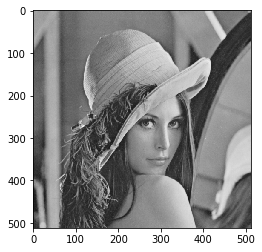

In [2]:
plt.imshow(img,cmap='gray', norm = None, vmin = 0, vmax = 0xff)
plt.show()


# (a) Dilation

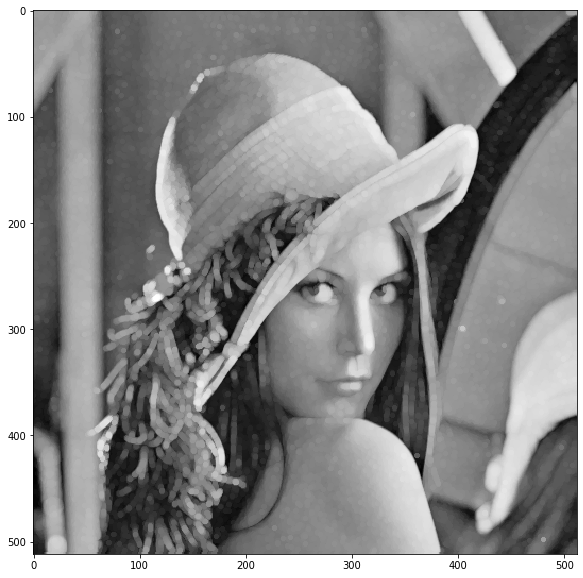

In [3]:
octogonKernel = [[-2, -1], [-2, 0], [-2, 1],
              [-1, -2], [-1, -1], [-1, 0], [-1, 1], [-1, 2],
              [0, -2], [0, -1], [0, 0], [0, 1], [0, 2],
              [1, -2], [1, -1], [1, 0], [1, 1], [1, 2],
              [2, -1], [2, 0], [2, 1]]

def dilation(img, kernel):
    img_dil = np.zeros(img.shape, np.int)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] > 0:
                max_value = 0
                for element in kernel:
                    x, y = element
                    if img.shape[0]>(i + x) >= 0 and  img.shape[1]>(j + y) >= 0 :
                        max_value = max(img[i + x][j + y],max_value)
                for element in kernel:
                    x, y = element
                    if img.shape[0]>(i + x) >= 0 and  img.shape[1]>(j + y) >= 0 :
                         img_dil[i + x][j + y] =max_value
    return img_dil


plt.figure(figsize=(10,10))
plt.imshow(dilation( (img),octogonKernel),cmap='gray')
plt.show()

# (b) Erosion

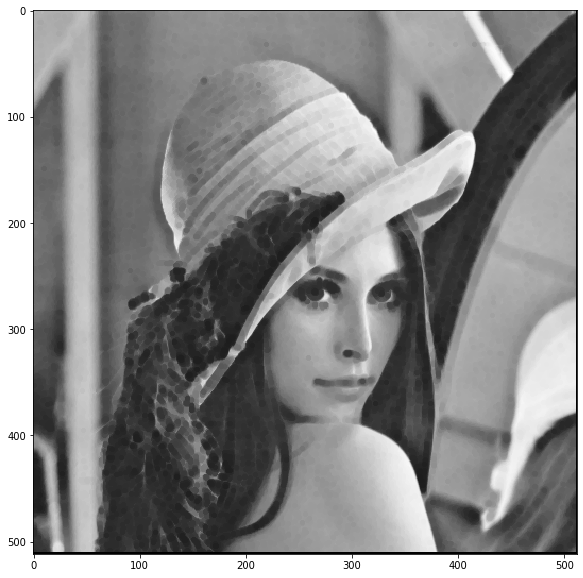

In [4]:
def erosion(img, kernel):
    img_ero = np.zeros(img.shape, np.int)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            exist = True
            min_value=300
            for element in kernel:
                x, y = element
                
                if img.shape[0]>(i + x) >=0 and img.shape[1]>(j + y) >=0:
                    if (img[i + x][j + y]==0):
                        exist = False
                        break
                    min_value=min(min_value,img[i + x][j + y])
            if exist:
                for element in kernel:
                    if img.shape[0]>(i + x) >=0 and img.shape[1]>(j + y) >=0:
                        img_ero[i][j] = min_value
    return img_ero
plt.figure(figsize=(10,10))
plt.imshow(erosion( (img),octogonKernel),cmap='gray')
plt.show()

# (c) opening


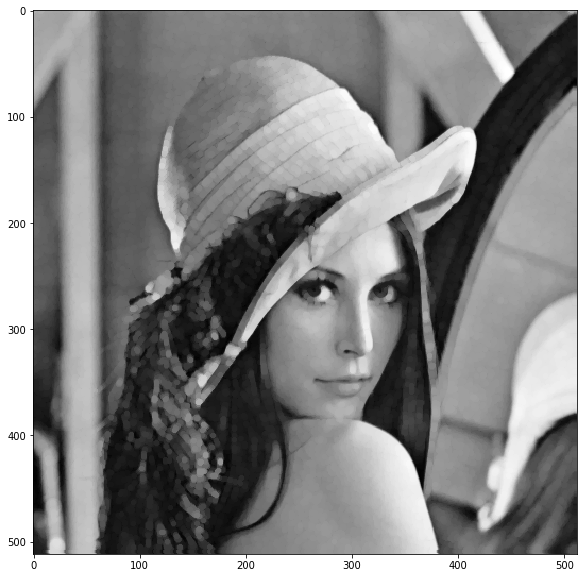

In [5]:
def opening(img, kernel):
    return dilation(erosion(img, kernel), kernel)
plt.figure(figsize=(10,10))
plt.imshow(opening( (img),octogonKernel),cmap='gray')
plt.show()

# (d) closing

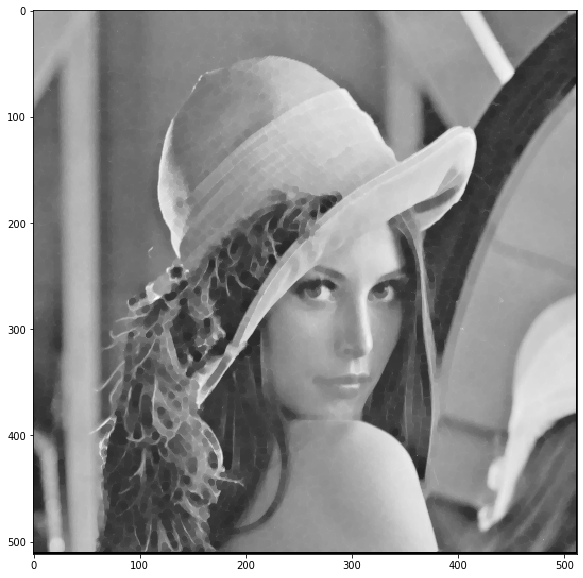

In [6]:
def closing(img, kernel):
    return erosion(dilation(img, kernel), kernel)
plt.figure(figsize=(10,10))
plt.imshow(closing( (img),octogonKernel),cmap='gray')
plt.show()